# 2.1 Instalación de las bibliotecas necesarias



In [1]:
import sns

'''pip install pandas matplotlib seaborn kagglehub
update pip'''


'pip install pandas matplotlib seaborn kagglehub\nupdate pip'

# 2.2 Descarga de la base de datos en formato .csv

import kagglehub
path = kagglehub.dataset_download("chitwanmanchanda/fraudulent-transactions-data")
print("Path to dataset files:", path)

import pandas as pd
df = pd.read_csv('C:/Users/abelc/PycharmProjects/Ciencia De Datos/BD/Fraud.csv')

# 2.3 Carga y exploración inicial de los datos

In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/abelc/PycharmProjects/Ciencia De Datos/BD/Fraud.csv')

# Muestra las primeras filas del DataFrame para verificar
print(df.head())
print(df.info)
print(df.describe)

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  
<bound method DataFrame.info of          step      type      amount     nameOrig  oldbalanceOrg  \
0     

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mapa de calor de la correlación entre variables
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de correlaciones")
plt.show()

In [2]:
# controlador de la cantidad de fraudes y transacciones no fraudulentas

cant_fraudes = df['isFraud'].sum()
print(f"Cantidad de transacciones fraudulentas: {cant_fraudes}" )

cant_no_fraudes = len(df) - cant_fraudes
print(f"Cantidad de transacciones no fraudulentas:{cant_no_fraudes}")

Cantidad de transacciones fraudulentas: 8213
Cantidad de transacciones no fraudulentas:6354407


plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="type", hue="isFraud")
plt.title("Cantidad de fraudes por tipo de transacción")
plt.xlabel("Tipo de transacción")
plt.ylabel("Cantidad")
plt.legend(title="Fraude", labels=["No", "Sí"])
plt.xticks(rotation=45)
plt.show()


# 2.4 Preparación de los datos
## 2.4.1 Eliminación de variables

In [3]:
# Lista de columnas a eliminar
columnas_a_eliminar = ['step', 'nameOrig', 'nameDest']
# Eliminar las columnas del DataFrame
df = df.drop(columns=columnas_a_eliminar)

# Verificamos que las columnas se eliminaron
df.head()

#quedaron variables numericas y de tipo

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [4]:
# VALORES NULOS
df.isnull().sum()

# VALORES DUPLICADOS
# SUMA DE LOS DUPLICADOS QUE EXISTAN
num_duplicados = df.duplicated().sum()

# MOSTRARA CUANTOS DUPLICADOS
# DONDE SE GENERARON, \\
# Ver ejemplos de filas duplicadas
duplicados = df[df.duplicated()]
# Contar cuántos de los duplicados son fraudes y cuántos no
duplicados_fraude = duplicados['isFraud'].sum()
duplicados_no_fraude = len(duplicados) - duplicados_fraude
# Mostrar resultados
{
"Total de duplicados": num_duplicados,
"Duplicados que son fraude": duplicados_fraude,
"Duplicados que no son fraude": duplicados_no_fraude
}

{'Total de duplicados': np.int64(97880),
 'Duplicados que son fraude': np.int64(61),
 'Duplicados que no son fraude': np.int64(97819)}

In [5]:
# ELIMINAR DATOS QUE NO APORTAN VALOR, EN ESTE CASO SON 61 DATOS DUPLICADOS QUE NO AFECTARIAN

df = df.drop_duplicates()

In [6]:
# Podemos resetear los índices
df = df.reset_index(drop=True)

## 2.4.4 Tratamiento de valores atípicos

In [7]:
import numpy as np
# pruebas de hipotesis (hip. nula o ) encontrar estadisticamente significativa, si dos variables estan altamente correlacionadas


# Seleccionar las columnas numéricas
columnas_numericas = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Inicializar un diccionario para almacenar el conteo de valores atípicos
conteo_outliers = {}

# Iterar sobre cada columna numérica
for columna in columnas_numericas:
  # Calcular el primer y tercer cuartil (Q1 y Q3)
  Q1 = df[columna].quantile(0.25)
  Q3 = df[columna].quantile(0.75)

  # Calcular el rango intercuartílico (IQR)
  IQR = Q3 - Q1

  # Definir los límites inferior y superior para los valores atípicos
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR

  # Contar los valores atípicos
  outliers = df[(df[columna] < limite_inferior) | \
  (df[columna] > limite_superior)]
  conteo_outliers[columna] = outliers.shape[0]


# Mostrar el conteo de valores atípicos por columna
for columna, conteo in conteo_outliers.items():
  print(f'Columna {columna}: {conteo} valores atípicos')
  total_outliers = sum(conteo_outliers.values())
  print(f"\nTotal de valores atípicos: {total_outliers}")
  print(f"El {total_outliers/len(df)}% de los valores son atípicos")

Columna amount: 331341 valores atípicos

Total de valores atípicos: 3949823
El 0.6304847447779157% de los valores son atípicos
Columna oldbalanceOrg: 1098406 valores atípicos

Total de valores atípicos: 3949823
El 0.6304847447779157% de los valores son atípicos
Columna newbalanceOrig: 1031683 valores atípicos

Total de valores atípicos: 3949823
El 0.6304847447779157% de los valores son atípicos
Columna oldbalanceDest: 767481 valores atípicos

Total de valores atípicos: 3949823
El 0.6304847447779157% de los valores son atípicos
Columna newbalanceDest: 720912 valores atípicos

Total de valores atípicos: 3949823
El 0.6304847447779157% de los valores son atípicos


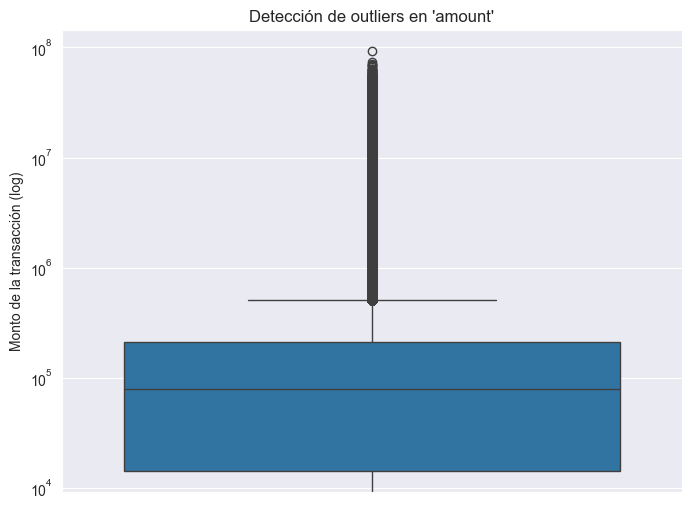

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y="amount")
plt.yscale("log")  # Usamos escala logarítmica si hay valores extremos
plt.title("Detección de outliers en 'amount'")
plt.ylabel("Monto de la transacción (log)")
plt.show()


In [9]:
# Diccionarios para almacenar los resultados
proporcion_outliers_fraude = {}
proporcion_outliers_no_fraude = {}
# Iterar sobre cada columna numérica
for columna in columnas_numericas:
  # Calcular IQR y límites para valores atípicos
  Q1 = df[columna].quantile(0.25)
  Q3 = df[columna].quantile(0.75)
  IQR = Q3 - Q1
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR
  # Identificar valores atípicos
  outliers = (df[columna] < limite_inferior) | \
  (df[columna] > limite_superior)

  # Contar la proporción de valores atípicos en fraudes y no fraudes
  proporcion_outliers_fraude[columna] = df[outliers & \
  (df['isFraud'] == 1)].shape[0] / df[df['isFraud'] == 1].shape[0]
  proporcion_outliers_no_fraude[columna] = df[outliers & \
  (df['isFraud'] == 0)].shape[0] / df[df['isFraud'] == 0].shape[0]

# Crear DataFrame con los resultados
df_proporcion_outliers = pd.DataFrame({
'Proporción en fraudes': proporcion_outliers_fraude,
'Proporción en no fraudes': proporcion_outliers_no_fraude
})
df_proporcion_outliers

,Proporción en fraudes,Proporción en no fraudes
amount,0.463199,0.052355
oldbalanceOrg,0.594701,0.174785
newbalanceOrig,0.019014,0.164871
oldbalanceDest,0.054956,0.122596
newbalanceDest,0.126840,0.115059


# PRUEBA DE HIPOTESIS

In [10]:
import scipy.stats as stats
# Diccionario para almacenar los resultados de la prueba de Chi-cuadrado
chi2_results = {}
df_Hip = df.copy()
# Iterar sobre cada columna numérica
for columna in columnas_numericas:
  # Calcular IQR y límites para valores atípicos
  Q1 = df_Hip[columna].quantile(0.25)
  Q3 = df_Hip[columna].quantile(0.75)
  IQR = Q3 - Q1
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR
  # Crear una columna binaria indicando si es un valor atípico o no
  df_Hip[f"{columna}_outlier"] = (df_Hip[columna] < limite_inferior) | \
  (df_Hip[columna] > limite_superior)

  # Construir tabla de contingencia
  tabla_contingencia = pd.crosstab(df_Hip[f"{columna}_outlier"],

  df_Hip["isFraud"])

  # Prueba de Chi-cuadrado
  chi2_stat, p_valor, _, _ = stats.chi2_contingency(tabla_contingencia)
  # Guardar los resultados
  chi2_results[columna] = {'Chi2': chi2_stat, 'p-valor': p_valor}


# Convertir los resultados a DataFrame y mostrarlos
df_chi2_results = pd.DataFrame(chi2_results).T
df_chi2_results

# SI EL P-VALOR ES MENOR A 0.5 SE DESCARTA LA HIP. NULA. DE QUE NO HAY UNA RELACION ENTRE VALORES ATIPICOS Y QUE ES FRAUDE, PERO SI EXISTE RELACION CON ESOS DATOS. NO SE ELIMINAN, SE MANTIENEN, CREAR UNA NUEVA VARIABLE CON EL VALOR ATIPICO

,Chi2,p-valor
amount,27425.218630,0.000000e+00
oldbalanceOrg,9925.593149,0.000000e+00
newbalanceOrig,1258.031500,1.491697e-275
oldbalanceDest,345.869212,3.362733e-77
newbalanceDest,10.980585,9.207136e-04


## 2.4.5 Creación de nuevas variables

In [11]:
# Crear nuevas variables binarias indicando si cada transacción es un valor
# atípico en 'amount' y 'oldbalanceOrg'
df_outliers = df.copy()
# Definir los límites de valores atípicos usando el
# método del Rango Intercuartílico (IQR)
for columna in ['amount', 'oldbalanceOrg']:
  Q1 = df_outliers[columna].quantile(0.25)
  Q3 = df_outliers[columna].quantile(0.75)
  IQR = Q3 - Q1
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR
  # Crear una nueva columna indicando si el valor es atípico (1) o no (0)
  df_outliers[f'{columna}_outlier'] = ((df_outliers[columna] < limite_inferior) | (df_outliers[columna] > limite_superior)).astype(int)

# Verificar que las nuevas columnas fueron añadidas correctamente
df_outliers.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_outlier,oldbalanceOrg_outlier
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,0,0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,0,0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0


## 2.4.6 Codificación de Variables Categóricas

In [12]:
# CON OH, CREAR UNA ESCALADAS EN NUEVAS VARIABLES CATEGORICAS
# NO HAY CATEGORIAS NO HAY UNA QUE NECESITE UNA DE OTRA
df_OH = pd.get_dummies(df_outliers, columns=['type'])
df_OH[["type_CASH_IN", "type_CASH_OUT", "type_DEBIT",
"type_PAYMENT", "type_TRANSFER"]].head()

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,False,True
3,False,True,False,False,False
4,False,False,False,True,False


## 2.4.7 Conversión de variables

In [13]:
df_OH.dtypes
# ELIGE TODAS LAS COLUMNAS DEL TIPO DE DATO QUE NOSOTROS DESEAMOS UTILIZAR, PARA DESPUES CAMBIARLOS Y PODER MANEJAR LOS DATOS, uint8 MANEJA NUMEROS POSITIVOS HACUENDO QUE SE REDUZCA EL NUMERO DE MEMORIA PARA CADA UNO DE LOS VALORES
columnas_booleanas = df_OH.select_dtypes(include=['bool']).columns
df_OH[columnas_booleanas] = df_OH[columnas_booleanas].astype(np.uint8)

## 2.4.8 División de los datos en entrenamiento y prueba

In [14]:
from sklearn.model_selection import train_test_split

# Separar características y variable objetivo
X = df_OH.drop(columns=['isFraud'])
y = df_OH['isFraud']


# Dividir en conjunto de entrenamiento (90%) y prueba (10%)
# con estratificación: AYUDA A QUE LOS DATOS DE ENTRENAMIENTO SEAN VARIADOS SIN SOBRE ENTRENARSE, QUE LO HAGA EN PROPORCION DE LOS DATOS DE CADA CONJUNTO,
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,)

In [15]:
# COMPROBACION DE LA ESTRATIFICACION


# Ver la relación entre fraudes y NO fraudes para el conjunto de prueba
cant_fraudes_test = sum(y_test)
cant_NO_fraudes_test = len(y_test)-sum(y_test)
proporcion_test = sum(y_test)/(len(y_test)-sum(y_test))
print(f"Cantidad de fraudes en el conjunto de prueba: \
{cant_fraudes_test}")
print(f"Cantidad de NO fraudes en el conjunto de prueba: \
{cant_NO_fraudes_test}")
print(f"Proporción (fraudes)/(NO fraudes) en el conjunto de prueba: \
{proporcion_test:.6f}")
# Ver la relación entre fraudes y NO fraudes para el
# conjunto de entrenamiento
cant_fraudes_train = sum(y_train)
cant_NO_fraudes_train = len(y_train)-sum(y_train)

# SUMA-CANTIDAD DE LA PROPORCION ENTRE FRAUDES Y NO FRAUDES EN EL CONJUNTO COMPLETO,
proporcion_train = sum(y_train)/(len(y_train)-sum(y_train))


print(f"Cantidad de fraudes en el conjunto de entrenamiento: \
{cant_fraudes_train}")
print(f"Cantidad de NO fraudes en el conjunto de entrenamiento: \
{cant_NO_fraudes_train}")
print(f"Proporción (fraudes)/(NO fraudes) en el conjunto de entrenamiento: \
{proporcion_train:.6f}")


#

Cantidad de fraudes en el conjunto de prueba: 847
Cantidad de NO fraudes en el conjunto de prueba: 625627
Proporción (fraudes)/(NO fraudes) en el conjunto de prueba: 0.001354
Cantidad de fraudes en el conjunto de entrenamiento: 7305
Cantidad de NO fraudes en el conjunto de entrenamiento: 5630961
Proporción (fraudes)/(NO fraudes) en el conjunto de entrenamiento: 0.001297


## 2.4.9 Estandarizar variables numéricas

In [16]:
from sklearn.preprocessing import StandardScaler
# Identificar columnas numéricas
columnas_numericas = X_train.select_dtypes(include=['float64']).columns
columnas_categoricas = X_train.select_dtypes(exclude=['float64']).columns
# Ajustar el escalador solo en las columnas numéricas
# El scaler se ajusta sólo con el conjunto de entrenamiento
scaler = StandardScaler()
# Solo transformar numéricas
X_train_numericas = scaler.fit_transform(X_train[columnas_numericas])
# Aplicar el mismo escalado en prueba
X_test_numericas = scaler.transform(X_test[columnas_numericas])

#LA MEDIA Y LA ESTANDAR, DE LA ESTANDARIZACION: RESTA LA MEDIA Y LO DIVIDE ENTRE LA DESVIACION ESTANDAR. SE MUESTRA UN ARRAY

In [17]:
# Convertir de nuevo a DataFrame incluyendo las categóricas sin modificar
X_train_scaled = pd.DataFrame(X_train_numericas,

columns=columnas_numericas,
index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_numericas,

columns=columnas_numericas,
index=X_test.index)
# Añadir columnas categóricas de nuevo sin modificar
X_train_scaled[columnas_categoricas] = X_train[columnas_categoricas].values
X_test_scaled[columnas_categoricas] = X_test[columnas_categoricas].values

X_train_scaled

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,amount_outlier,oldbalanceOrg_outlier,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
858797,0.332017,-0.285575,-0.159018,0.332614,0.189668,0,0,0,1,0,0,0,0
2500201,-0.243111,-0.274000,-0.289713,-0.325641,-0.335227,0,0,0,0,0,0,1,0
3568122,-0.277489,-0.291062,-0.294843,-0.325641,-0.335227,0,0,0,0,0,0,1,0
4143608,0.087758,-0.163912,-0.249252,-0.218330,-0.172418,0,0,1,0,1,0,0,0
2562603,-0.291441,-0.291062,-0.294843,-0.325641,-0.335227,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5010712,0.222630,-0.266323,-0.294843,-0.325641,-0.249581,0,0,0,0,1,0,0,0
3569158,0.299516,-0.259744,-0.294843,-0.209873,-0.129887,0,0,0,0,1,0,0,0
3730179,-0.037578,1.794308,1.819094,-0.055968,-0.128760,0,0,1,1,0,0,0,0
997415,-0.298966,-0.283098,-0.287173,-0.325641,-0.335227,0,0,0,0,0,0,1,0


## 2.4.10 Balanceo de clases

In [18]:
from imblearn.over_sampling import SMOTE
# Aplicar SMOTE en el conjunto de entrenamiento
# (sin afectar el conjunto de prueba)
smote = SMOTE(sampling_strategy=0.3, random_state=42) # Genera más de fraudes
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# Verificar la nueva distribución de clases después de SMOTE
print("Distribución de clases después de SMOTE en entrenamiento:")
print(y_train_resampled.value_counts())

# Ver la relación entre fraudes y NO fraudes para el conjunto de pruebA
cant_fraudes_test = y_train_resampled.value_counts()[1]
cant_NO_fraudes_test = y_train_resampled.value_counts()[0]
proporcion_test = sum(y_test)/(len(y_test)-sum(y_test))
print(f"Cantidad de fraudes en el conjunto de prueba: \
{cant_fraudes_test}")
print(f"Cantidad de NO fraudes en el conjunto de prueba: \
{cant_NO_fraudes_test}")
print(f"Proporción (fraudes)/(NO fraudes) después de usar SMOTE: \
{cant_fraudes_test/cant_NO_fraudes_test:.4f}")

# PASA MINORISTA QUE TENGA EL 30% DE LOS DATOS DE L MAYORIA PARA TENER UN EQUILIBRIO
# AUMENTA LA CANTIDAD DE DATOS EN FRAUDE PARA COMPENSAR UN BALANCEO
# ANADIR MAS PESO A UNA VARIABLE QUE A OTRAS

# INDICA LA CANTIDAD MINIMA A LA CANTIDAD MAYORITARIA
# INDICA QUE LA PROPORCION DEL MODELO DE LA FUNCION SMOKE QUE HIZO BIEN

Distribución de clases después de SMOTE en entrenamiento:
isFraud
0    5630961
1    1689288
Name: count, dtype: int64
Cantidad de fraudes en el conjunto de prueba: 1689288
Cantidad de NO fraudes en el conjunto de prueba: 5630961
Proporción (fraudes)/(NO fraudes) después de usar SMOTE: 0.3000


## 3 Random Forest

### Combinacion 1

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hiperparámetros del modelo
params = {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2}

# Crear y entrenar el modelo
model = RandomForestClassifier(**params, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
report = classification_report(y_test, y_pred, output_dict=True)

# Mostrar resultados
print(f"Modelo 1 - Hiperparámetros: {params}")
print(f"Precision: {report['1']['precision']:.4f}")
print(f"Recall: {report['1']['recall']:.4f}")
print(f"F1-score: {report['1']['f1-score']:.4f}")#%% md
## 2.5 Random Forest

Modelo 1 - Hiperparámetros: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2}
Precision: 0.9878
Recall: 0.7318
F1-score: 0.8407


### Combinacion 2

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
# Hiperparámetros del modelo
params = {'n_estimators': 50, 'max_depth': 9, 'min_samples_split': 2}

# Crear y entrenar el modelo
model = RandomForestClassifier(**params, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
report = classification_report(y_test, y_pred, output_dict=True)

# Mostrar resultados
print(f"Modelo 2 - Hiperparámetros: {params}")
print(f"Precision: {report['1']['precision']:.4f}")
print(f"Recall: {report['1']['recall']:.4f}")
print(f"F1-score: {report['1']['f1-score']:.4f}")

Modelo 2 - Hiperparámetros: {'n_estimators': 50, 'max_depth': 9, 'min_samples_split': 2}
Precision: 0.9950
Recall: 0.7197
F1-score: 0.8353


### Combinacion 3

In [22]:
# vamos a visualizar el conjunto final:
X_train_resampled
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
# Hiperparámetros del modelo
params = {'n_estimators': 40, 'max_depth': 8, 'min_samples_split': 2}

# Crear y entrenar el modelo
model = RandomForestClassifier(**params, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
report = classification_report(y_test, y_pred, output_dict=True)

# Mostrar resultados
print(f"Modelo 3 - Hiperparámetros: {params}")
print(f"Precision: {report['1']['precision']:.4f}")
print(f"Recall: {report['1']['recall']:.4f}")
print(f"F1-score: {report['1']['f1-score']:.4f}")

Modelo 2 - Hiperparámetros: {'n_estimators': 40, 'max_depth': 8, 'min_samples_split': 2}
Precision: 0.9918
Recall: 0.7269
F1-score: 0.8390


### Combinacion 4

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
# Hiperparámetros del modelo
params = {'n_estimators': 30, 'max_depth': 7, 'min_samples_split': 2}

# Crear y entrenar el modelo
model = RandomForestClassifier(**params, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
report = classification_report(y_test, y_pred, output_dict=True)

# Mostrar resultados
print(f"Modelo 4 - Hiperparámetros: {params}")
print(f"Precision: {report['1']['precision']:.4f}")
print(f"Recall: {report['1']['recall']:.4f}")
print(f"F1-score: {report['1']['f1-score']:.4f}")

Modelo 2 - Hiperparámetros: {'n_estimators': 30, 'max_depth': 7, 'min_samples_split': 2}
Precision: 0.9978
Recall: 0.5570
F1-score: 0.7149


### Combinacion 5

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
# Hiperparámetros del modelo
params = {'n_estimators': 20, 'max_depth': 6, 'min_samples_split': 2}

# Crear y entrenar el modelo
model = RandomForestClassifier(**params, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
report = classification_report(y_test, y_pred, output_dict=True)

# Mostrar resultados
print(f"Modelo 2 - Hiperparámetros: {params}")
print(f"Precision: {report['1']['precision']:.4f}")
print(f"Recall: {report['1']['recall']:.4f}")
print(f"F1-score: {report['1']['f1-score']:.4f}")

Modelo 2 - Hiperparámetros: {'n_estimators': 20, 'max_depth': 6, 'min_samples_split': 2}
Precision: 0.9975
Recall: 0.4888
F1-score: 0.6561


## XGBoost

### Combinacion 1

In [25]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Hiperparámetros del modelo
params = {'n_estimators': 50, 'max_depth': 4, 'learning_rate': 0.1}

# Crear y entrenar el modelo
model = XGBClassifier(**params, random_state=42, use_label_encoder=False)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
report = classification_report(y_test, y_pred, output_dict=True)

# Mostrar resultados
print(f"Modelo 2 - Hiperparámetros: {params}")
print(f"Precision: {report['1']['precision']:.4f}")
print(f"Recall: {report['1']['recall']:.4f}")
print(f"F1-score: {report['1']['f1-score']:.4f}")

C:\Users\abelc\PycharmProjects\Ciencia De Datos\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:20:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Modelo 1 - Hiperparámetros: {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1}
Precision: 0.9694
Recall: 0.7245
F1-score: 0.8293


### Combinacion 2

In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Hiperparámetros del modelo
params = {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1}

# Crear y entrenar el modelo
model = XGBClassifier(**params, random_state=42, use_label_encoder=False)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
report = classification_report(y_test, y_pred, output_dict=True)

# Mostrar resultados
print(f"Modelo 2 - Hiperparámetros: {params}")
print(f"Precision: {report['1']['precision']:.4f}")
print(f"Recall: {report['1']['recall']:.4f}")
print(f"F1-score: {report['1']['f1-score']:.4f}")

C:\Users\abelc\PycharmProjects\Ciencia De Datos\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:22:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Modelo 2 - Hiperparámetros: {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1}
Precision: 0.9728
Recall: 0.7336
F1-score: 0.8364


### Combinacion 3

In [27]:
# Hiperparámetros del modelo
params = {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.05}

# Crear y entrenar el modelo
model = XGBClassifier(**params, random_state=42, use_label_encoder=False)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
report = classification_report(y_test, y_pred, output_dict=True)

# Mostrar resultados
print(f"Modelo 3 - Hiperparámetros: {params}")
print(f"Precision: {report['1']['precision']:.4f}")
print(f"Recall: {report['1']['recall']:.4f}")
print(f"F1-score: {report['1']['f1-score']:.4f}")

C:\Users\abelc\PycharmProjects\Ciencia De Datos\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:23:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Modelo 3 - Hiperparámetros: {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.05}
Precision: 0.9614
Recall: 0.7197
F1-score: 0.8232


### Combinacion 4

In [28]:
# Hiperparámetros del modelo
params = {'n_estimators': 30, 'max_depth': 6, 'learning_rate': 0.03}

# Crear y entrenar el modelo
model = XGBClassifier(**params, random_state=42, use_label_encoder=False)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
report = classification_report(y_test, y_pred, output_dict=True)

# Mostrar resultados
print(f"Modelo 4 - Hiperparámetros: {params}")
print(f"Precision: {report['1']['precision']:.4f}")
print(f"Recall: {report['1']['recall']:.4f}")
print(f"F1-score: {report['1']['f1-score']:.4f}")

C:\Users\abelc\PycharmProjects\Ciencia De Datos\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:23:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Modelo 4 - Hiperparámetros: {'n_estimators': 30, 'max_depth': 6, 'learning_rate': 0.01}
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000


C:\Users\abelc\PycharmProjects\Ciencia De Datos\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abelc\PycharmProjects\Ciencia De Datos\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abelc\PycharmProjects\Ciencia De Datos\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

### Combinacion 5

In [29]:
# Hiperparámetros del modelo
params = {'n_estimators': 20, 'max_depth': 7, 'learning_rate': 0.2}

# Crear y entrenar el modelo
model = XGBClassifier(**params, random_state=42, use_label_encoder=False)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
report = classification_report(y_test, y_pred, output_dict=True)

# Mostrar resultados
print(f"Modelo 5 - Hiperparámetros: {params}")
print(f"Precision: {report['1']['precision']:.4f}")
print(f"Recall: {report['1']['recall']:.4f}")
print(f"F1-score: {report['1']['f1-score']:.4f}")

C:\Users\abelc\PycharmProjects\Ciencia De Datos\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:23:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Modelo 5 - Hiperparámetros: {'n_estimators': 20, 'max_depth': 7, 'learning_rate': 0.2}
Precision: 0.9398
Recall: 0.7245
F1-score: 0.8182


## ANN

### Combinacion 1

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report

# Crear el modelo
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=5, batch_size=512, verbose=1)

# Evaluar el modelo
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

C:\Users\abelc\PycharmProjects\Ciencia De Datos\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9812 - loss: 631.9865
Epoch 2/5
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9867 - loss: 9.2543
Epoch 3/5
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9987 - loss: 0.0217
Epoch 4/5
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9987 - loss: 0.0245
Epoch 5/5
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9987 - loss: 0.0300
19578/19578 ━━━━━━━━━━━━━━━━━━━━ 11s 543us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    625627
           1       0.00      0.00      0.00       847

    accuracy                           1.00    626474
   macro avg       0.50      0.50      0.50    626474
weighted avg       1.00      1.00      1.00    626474



C:\Users\abelc\PycharmProjects\Ciencia De Datos\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abelc\PycharmProjects\Ciencia De Datos\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abelc\PycharmProjects\Ciencia De Datos\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

### Combinacion 2

In [25]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1)

y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

C:\Users\abelc\PycharmProjects\Ciencia De Datos\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 57s 5ms/step - accuracy: 0.9802 - loss: 140.9173
Epoch 2/10
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step - accuracy: 0.9844 - loss: 10.1036
Epoch 3/10
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9968 - loss: 1.3895
Epoch 4/10
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9987 - loss: 0.0261
Epoch 5/10
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9986 - loss: 0.0275
Epoch 6/10
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9986 - loss: 0.0164
Epoch 7/10
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9987 - loss: 0.0356
Epoch 8/10
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9987 - loss: 0.0690
Epoch 9/10
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9987 - loss: 0.1193
Epoch 10/10
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9987 - loss: 0.0216
19578/19578 ━━━━━━━━━━━━━━━━━━━━ 10s 521us/step
              precision    recall  f1-

C:\Users\abelc\PycharmProjects\Ciencia De Datos\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abelc\PycharmProjects\Ciencia De Datos\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abelc\PycharmProjects\Ciencia De Datos\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

### Combinacion 3

In [28]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=15, batch_size=512, verbose=1)

y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

C:\Users\abelc\PycharmProjects\Ciencia De Datos\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.9828 - loss: 127.7639
Epoch 2/15
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 93s 8ms/step - accuracy: 0.9987 - loss: 0.0324
Epoch 3/15
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.9987 - loss: 0.0250
Epoch 4/15
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.9987 - loss: 0.2066
Epoch 5/15
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9987 - loss: 0.0289
Epoch 6/15
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9987 - loss: 0.0644
Epoch 7/15
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9987 - loss: 0.1306
Epoch 8/15
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9987 - loss: 0.0098
Epoch 9/15
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9987 - loss: 0.1391
Epoch 10/15
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9987 - loss: 0.0108
Epoch 11/15
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9987 - loss: 0.

C:\Users\abelc\PycharmProjects\Ciencia De Datos\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abelc\PycharmProjects\Ciencia De Datos\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abelc\PycharmProjects\Ciencia De Datos\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

### Combinacion 4

In [26]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1)

y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

C:\Users\abelc\PycharmProjects\Ciencia De Datos\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9973 - loss: nan
Epoch 2/20
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9987 - loss: nan
Epoch 3/20
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9987 - loss: nan
Epoch 4/20
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9987 - loss: nan
Epoch 5/20
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9987 - loss: nan
Epoch 6/20
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9987 - loss: nan
Epoch 7/20
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9987 - loss: nan
Epoch 8/20
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9987 - loss: nan
Epoch 9/20
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9987 - loss: nan
Epoch 10/20
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9987 - loss: nan
Epoch 11/20
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9987 - loss: nan
Epoch 12/20
11013/11013 ━━━━━━

C:\Users\abelc\PycharmProjects\Ciencia De Datos\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abelc\PycharmProjects\Ciencia De Datos\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abelc\PycharmProjects\Ciencia De Datos\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

### Combinacion 5

In [27]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=25, batch_size=512, verbose=1)

y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

C:\Users\abelc\PycharmProjects\Ciencia De Datos\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9889 - loss: 132.1860
Epoch 2/25
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9968 - loss: 4.6750
Epoch 3/25
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9975 - loss: 1.1555
Epoch 4/25
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9975 - loss: 1.1865
Epoch 5/25
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9977 - loss: 0.7127
Epoch 6/25
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9977 - loss: 1.1369
Epoch 7/25
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9976 - loss: 0.7216
Epoch 8/25
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9968 - loss: 2.0845
Epoch 9/25
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9973 - loss: 0.6610
Epoch 10/25
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9967 - loss: 0.6288
Epoch 11/25
11013/11013 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9978 - loss: 0.

## 3 Regresion

In [33]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Cargar el dataset (asegurarse de que no se interpreten encabezados incorrectamente)
df = pd.read_csv(
    'C:/Users/abelc/PycharmProjects/Ciencia De Datos/BD/monthly-beer-production-in-austr - monthly-beer-production-in-austr.csv',
    header=0,  # Cambiar a 0 si el archivo tiene encabezados válidos
    names=['Month', 'Production']
)

# Verificar los valores de la columna 'Month'
print(df['Month'].head())

# Eliminar filas con valores no válidos en 'Month'
df = df[df['Month'] != 'Month']  # Eliminar encabezados repetidos si existen

# Convertir la columna 'Month' al formato datetime
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m', errors='coerce')

# Eliminar filas con conversiones fallidas
df = df.dropna(subset=['Month'])

# Ordenar los datos cronológicamente
df = df.sort_values(by='Month').reset_index(drop=True)

# Normalizar la variable de producción usando MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df['Production_Normalized'] = scaler.fit_transform(df[['Production']])

# Mostrar los primeros registros para verificar
print(df.head())

0    1956-01
1    1956-02
2    1956-03
3    1956-04
4    1956-05
Name: Month, dtype: object
       Month  Production  Production_Normalized
0 1956-01-01        93.2               0.185621
1 1956-02-01        96.0               0.203922
2 1956-03-01        95.2               0.198693
3 1956-04-01        77.1               0.080392
4 1956-05-01        70.9               0.039869


### 3.1 Modelo de random forest

### 3.2 Combinaciones

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba
X = df['Month'].apply(lambda x: x.toordinal()).to_frame()  # Convertir fechas a ordinales
y = df['Production_Normalized']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lista de combinaciones de hiperparámetros
param_combinations = [
    {'n_estimators': 50, 'max_depth': 5, 'min_samples_split': 2},
    {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 4},
    {'n_estimators': 150, 'max_depth': 15, 'min_samples_split': 2},
    {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 5},
    {'n_estimators': 300, 'max_depth': None, 'min_samples_split': 10},
]

# Entrenar y evaluar cada combinación
for i, params in enumerate(param_combinations, 1):
    model = RandomForestRegressor(**params, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calcular métricas
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Mostrar resultados
    print(f"Combinación {i} - Hiperparámetros: {params}")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"R²: {r2:.4f}\n")

Combinación 1 - Hiperparámetros: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 5}
MSE: 0.0155
R^2: 0.7341

Combinación 2 - Hiperparámetros: {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 10}
MSE: 0.0171
R^2: 0.7056

Combinación 3 - Hiperparámetros: {'n_estimators': 300, 'max_depth': 30, 'min_samples_split': 15}
MSE: 0.0176
R^2: 0.6984

Combinación 4 - Hiperparámetros: {'n_estimators': 400, 'max_depth': 40, 'min_samples_split': 20}
MSE: 0.0178
R^2: 0.6946

Combinación 5 - Hiperparámetros: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 25}
MSE: 0.0179
R^2: 0.6927



## LSTM

In [50]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Preparar los datos para LSTM
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Crear secuencias para LSTM
def create_sequences(data, target, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(data) - seq_length):
        X_seq.append(data[i:i + seq_length])
        y_seq.append(target[i + seq_length])
    return np.array(X_seq), np.array(y_seq)

seq_length = 12  # Usar 12 meses como secuencia
X_seq, y_seq = create_sequences(X_scaled, y_scaled, seq_length)

# Dividir en entrenamiento y prueba
split = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

# Lista de combinaciones de hiperparámetros
param_combinations = [
    {'units': 50, 'epochs': 10, 'batch_size': 32},
    {'units': 100, 'epochs': 20, 'batch_size': 64},
    {'units': 150, 'epochs': 30, 'batch_size': 128},
    {'units': 200, 'epochs': 40, 'batch_size': 256},
    {'units': 300, 'epochs': 50, 'batch_size': 512},
]

# Entrenar y evaluar cada combinación
for i, params in enumerate(param_combinations, 1):
    model = Sequential()
    model.add(LSTM(params['units'], input_shape=(seq_length, 1), activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Entrenar el modelo
    model.fit(X_train, y_train, epochs=params['epochs'], batch_size=params['batch_size'], verbose=0)

    # Realizar predicciones
    y_pred = model.predict(X_test)

    # Calcular métricas
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Mostrar resultados
    print(f"Combinación {i} - Hiperparámetros: {params}")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"R²: {r2:.4f}\n")

C:\Users\abelc\PycharmProjects\Ciencia De Datos\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Combinación 1 - Hiperparámetros: {'units': 50, 'epochs': 10, 'batch_size': 32}
MAE: 0.2694
MSE: 0.0918
R²: -3.3746



C:\Users\abelc\PycharmProjects\Ciencia De Datos\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/stepWARNING:tensorflow:6 out of the last 19584 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001A7D104D8A0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Combinación 2 - Hiperparámetros: {'units': 100, 'epochs': 20, 'batch_size': 64}
MAE: 0.2501
MSE: 0.0796
R²: -2.7949



C:\Users\abelc\PycharmProjects\Ciencia De Datos\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Combinación 3 - Hiperparámetros: {'units': 150, 'epochs': 30, 'batch_size': 128}
MAE: 0.2455
MSE: 0.0766
R²: -2.6490



C:\Users\abelc\PycharmProjects\Ciencia De Datos\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Combinación 4 - Hiperparámetros: {'units': 200, 'epochs': 40, 'batch_size': 256}
MAE: 0.2473
MSE: 0.0777
R²: -2.7040



C:\Users\abelc\PycharmProjects\Ciencia De Datos\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Combinación 5 - Hiperparámetros: {'units': 300, 'epochs': 50, 'batch_size': 512}
MAE: 0.2517
MSE: 0.0805
R²: -2.8363

